In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re
import Functions

In [70]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score,make_scorer
from scipy.stats import ks_2samp

In [71]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
import warnings

## Data Analysis and pre processing

https://www.kaggle.com/datasets/abdmental01/email-spam-dedection

In [73]:
df = pd.read_csv("/Users/user/Documents/Spam_Detection/Data/mail_data.csv") #PATH

In [74]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
df.shape

(5572, 2)

In [76]:
df.tail

<bound method NDFrame.tail of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [77]:
df=df.drop_duplicates()

In [78]:
df.shape

(5157, 2)

In [79]:
df.tail

<bound method NDFrame.tail of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5157 rows x 2 columns]>

In [80]:
df.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,Rofl. Its true to its name
freq,4516,1


In [81]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [82]:
df=df.reset_index()

In [83]:
df.shape

(5157, 3)

In [84]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

In [85]:
df.replace({'Category':{'ham':0,'spam':1}},inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23884\3603070565.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Category':{'ham':0,'spam':1}},inplace=True)


In [86]:
df.shape

(5157, 3)

In [87]:
df.head()

,index,Category,Message
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     5157 non-null   int64 
 1   Category  5157 non-null   int64 
 2   Message   5157 non-null   object
dtypes: int64(2), object(1)
memory usage: 121.0+ KB


<Axes: xlabel='Category', ylabel='count'>

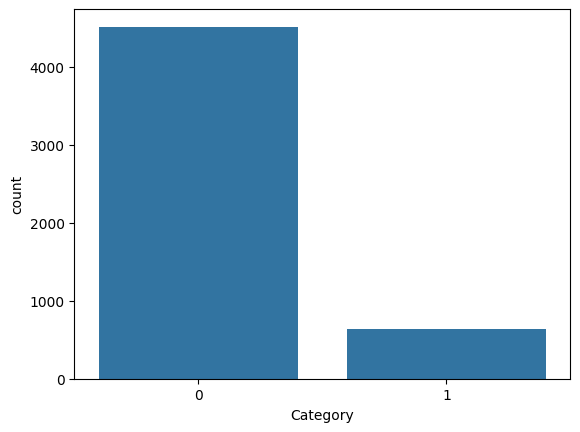

In [89]:
sns.countplot(x='Category',data = df)

In [90]:
ham_messages = df[df['Category'] == 0]['Message']
spam_messages = df[df['Category'] == 1]['Message']

ham_text = ' '.join(ham_messages)
spam_text = ' '.join(spam_messages)

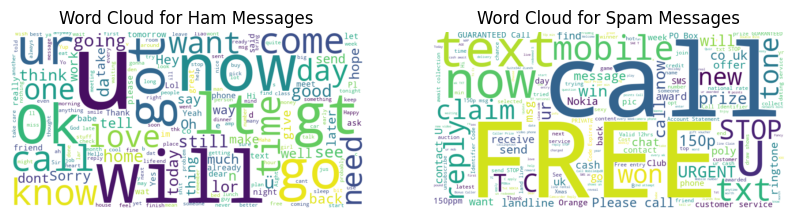

In [91]:
Functions.wordcloudplot(ham_text,spam_text)

In [95]:
df["Message"]=np.array(Functions.change_format(df['Message']))

In [96]:
df

,index,Category,Message
0,0,0,go jurong point crazy available bugis n great ...
1,1,0,ok lar joking wif u oni
2,2,1,free entry wkly comp win fa cup final tkts st ...
3,3,0,u dun say early hor u c already say
4,4,0,nah think go usf life around though
...,...,...,...
5152,5567,1,nd time tried contact u u pound prize claim ea...
5153,5568,0,b going esplanade fr home
5154,5569,0,pity mood suggestion
5155,5570,0,guy bitching acted like interested buying some...


In [ ]:
df.to_csv("/Users/user/Documents/Spam_Detection/Data/data_clear.csv", index=False)